In [7]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
import dill

In [8]:
def imageprepare(argv):
    """
    This function returns the pixel values.
    The input is a png file location.
    """
    image = Image.open(argv).convert('L')
    width = float(image.size[0])
    height = float(image.size[1])
    
    # creates white canvas of 28x28 pixels
    new_image = Image.new('L', (28, 28), (255))  

    # check which dimension is bigger
    if width > height:  
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = image.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        new_image.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = image.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical position
        new_image.paste(img, (wleft, 4))  # paste resized image on white canvas

    # new_image.save("test_saved.png")
    # get pixel values
    tv = list(new_image.getdata())  
    # reverse black and white
    tva = [(255 - x) for x in tv]
    return tva

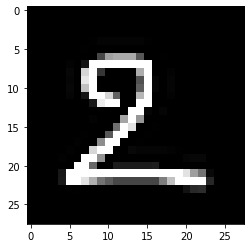

In [9]:
x = imageprepare('./test/test.png') #file path here
x = np.array(x)
x = np.reshape(x, (28,28))
plt.gray()
plt.imshow(x)
plt.show()

In [10]:
dill.load_session('model.db')

In [11]:
inputs = np.reshape(x, (784,1))/255.0
# target = np.array([[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.]]) # 0 
# target = np.array([[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.]]) # 1 
target = np.array([[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.],[0.]]) # 2 
# target = np.array([[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.],[0.]]) # 3 
# target = np.array([[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.],[0.]]) # 4 
# target = np.array([[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.],[0.]]) # 5 
# target = np.array([[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.],[0.]]) # 6 
# target = np.array([[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.],[0.]]) # 7 
# target = np.array([[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.],[0.]]) # 8 
# target = np.array([[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[0.],[1.]]) # 9 

In [12]:
nn.predict(inputs, target)

Predict = 2, Actual = 2 ==> Correct


0.8067810752547511